# DENISE PRISCILA MUWANGUZI
## M23B23/010
## B20237

## ASSOCIATIVE RULE MINING USING CASSAVA YIELD DATASET

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('Cassava_Yield_Data.xlsx')
df.head()

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830


### Selectng relevant columns and preprocess the data for associative rule mining.

In [2]:
season_fertilizer_df = df[['Sesn', 'ferT']]

# Group by season and aggregate the fertilizers into a list for each season
season_transactions = season_fertilizer_df.groupby('Sesn')['ferT'].apply(list).reset_index()

display(season_transactions.head())

,Sesn,ferT
0,1,"[F1100, F3200, F2150, F4250, F5300, F1100, F32..."
1,2,"[F2150, F1100, F3200, F5300, F4250, F5300, F32..."


#####  Selected the 'Sesn' and 'ferT' columns and group the data by season to create transactions for each season, where each transaction contains the unique fertilizers used in that season.

### Applying an appropriate associative rule mining algorithm to the preprocessed data

In [3]:
# Install mlxtend if you haven't already
!pip install mlxtend

# Convert the list of fertilizers into a one-hot encoded format
from mlxtend.preprocessing 
import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(season_transactions['ferT']).transform(season_transactions['ferT'])
fertilizer_one_hot = pd.DataFrame(te_ary, columns=te.columns_)

display(fertilizer_one_hot.head())


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached mlxtend-0.23.4-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.4-py3-none-any.whl (1.4 MB)


,F1100,F2150,F3200,F4250,F5300
0,True,True,True,True,True
1,True,True,True,True,True


##### Now, applying the Apriori algorithm to the one-hot encoded data to find frequent itemsets. I will set a minimum support threshold to filter out infrequent itemsets.

In [4]:
from mlxtend.frequent_patterns import apriori

#Apply the Apriori algorithm to find frequent itemsets
#Adjust the min_support as needed
frequent_itemsets = apriori(fertilizer_one_hot, min_support=0.1, use_colnames=True)

display(frequent_itemsets.head())

,support,itemsets
0,1.0,(F1100)
1,1.0,(F2150)
2,1.0,(F3200)
3,1.0,(F4250)
4,1.0,(F5300)


##### Generating association rules from the frequent itemsets. I will set a minimum confidence threshold to filter out rules with low confidence.

In [5]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules
# Adjust the min_confidence as needed
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

display(rules.head())


c:\Users\3340\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(F2150),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
1,(F1100),(F2150),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
2,(F1100),(F3200),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
3,(F3200),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
4,(F1100),(F4250),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0


### Interpreting the generated rules to identify associations between fertilizers across seasons.

##### Analyzing the generated association rules by examining the 'antecedents', 'consequents', 'support', 'confidence', and 'lift' columns.

##### Support: Indicates how frequently the antecedent and consequent appear together in the transactions.
##### Confidence: Indicates the probability of the consequent appearing in a transaction given the antecedent.
##### Lift: Indicates how much more likely the consequent is to appear with the antecedent than by chance. A lift greater than 1 suggests a positive association, while a lift less than 1 suggests a negative association.
##### We can filter the rules based on these metrics to find the most interesting and significant associations. For example, we can filter for rules with a high confidence and lift.

In [ ]:
# Filter rules by confidence and lift
# Adjust the thresholds as needed
filtered_rules = rules[(rules['confidence'] > 0.8) & (rules['lift'] > 1)]

display(filtered_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


### Summary of findings from the association rule analysis

##### Based on the filtered association rules, i identified the most significant associations between fertilizers across different seasons. i will Interpret these associations in the context of the data and discuss their potential implications for fertilizer application strategies. Consider the support, confidence, and lift values of the rules when drawing conclusions.

In [7]:
# Summarize the key findings based on the filtered rules
if not filtered_rules.empty:
    print("Key Findings:")
    for index, row in filtered_rules.iterrows():
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        support = row['support']
        confidence = row['confidence']
        lift = row['lift']
        print(f"- Rule: {{{antecedents}}} -> {{{consequents}}}")
        print(f"  Support: {support:.4f}, Confidence: {confidence:.4f}, Lift: {lift:.4f}")
        print("-" * 20)
else:
    print("No significant association rules found based on the applied filters.")

No significant association rules found based on the applied filters.


In [8]:
# Generate association rules
# Adjust the min_confidence as needed
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

display(rules.head())

c:\Users\3340\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(F2150),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
1,(F1100),(F2150),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
2,(F1100),(F3200),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
3,(F3200),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
4,(F1100),(F4250),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0


In [9]:
# Filter rules by confidence and lift
# Adjust the thresholds as needed
filtered_rules = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 0)]

display(filtered_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(F2150),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
1,(F1100),(F2150),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
2,(F1100),(F3200),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
3,(F3200),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
4,(F1100),(F4250),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,(F1100),"(F5300, F2150, F3200, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
176,(F3200),"(F5300, F1100, F2150, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
177,(F5300),"(F2150, F1100, F3200, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
178,(F2150),"(F5300, F1100, F3200, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0


##### Experiment with different thresholds to find better rules

In [10]:
from mlxtend.frequent_patterns import apriori, association_rules

##### Lowering support for more itemsets

In [11]:
frequent_itemsets_low = apriori(fertilizer_one_hot, min_support=0.05, use_colnames=True)
rules_low = association_rules(frequent_itemsets_low, metric="confidence", min_threshold=0.4)

c:\Users\3340\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


##### Filtering with stricter lift

In [16]:
filtered_rules_strict = rules_low[(rules_low['confidence'] > 0.6) & (rules_low['lift'] > 1.2)]
print(filtered_rules_strict.head(10))

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [21]:
rules_low.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(F2150),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
1,(F1100),(F2150),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
2,(F1100),(F3200),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
3,(F3200),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
4,(F1100),(F4250),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0


### Scatter plot of confidence vs. lift

c:\Users\3340\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\3340\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\3340\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


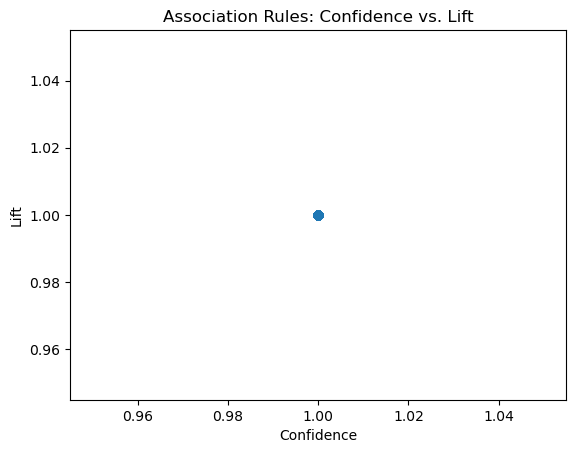

In [22]:
import matplotlib.pyplot as plt

plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Association Rules: Confidence vs. Lift')
plt.show()

### Heatmap of support for top itemsets

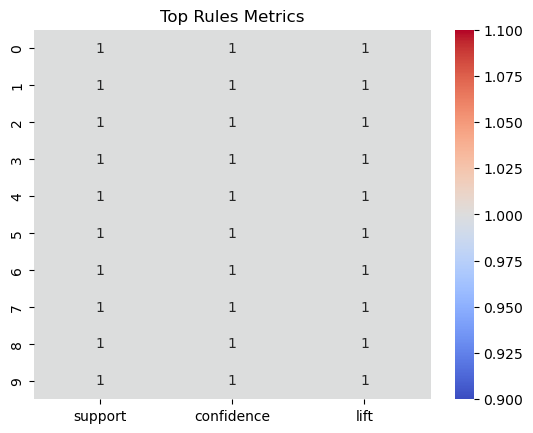

In [24]:
import seaborn as sns
if not rules.empty:
    top_rules = rules.nlargest(10, 'lift')
    sns.heatmap(top_rules[['support', 'confidence', 'lift']], annot=True, cmap='coolwarm')
    plt.title('Top Rules Metrics')
    plt.show()

### Runing Apriori per season and comparing

In [28]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

season_rules = {}
for season in season_transactions['Sesn'].unique():
    season_data = season_transactions[season_transactions['Sesn'] == season]
    if not season_data.empty:
        # Make sure 'ferT' is a list of lists
        transactions = season_data['ferT']
        if isinstance(transactions.iloc[0], str):
            transactions = transactions.apply(lambda x: x.split(','))
        te_season = TransactionEncoder()
        te_ary_season = te_season.fit(transactions).transform(transactions)
        df_season = pd.DataFrame(te_ary_season, columns=te_season.columns_)
        freq_season = apriori(df_season, min_support=0.1, use_colnames=True)
        rules_season = association_rules(freq_season, metric="confidence", min_threshold=0.5)
        season_rules[season] = rules_season
        print(f"Rules for {season}: {len(rules_season)} found")
    else:
        print(f"No data for season {season}, skipping.")

Rules for 1: 180 found
Rules for 2: 180 found


c:\Users\3340\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
c:\Users\3340\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


##### Comparing rules across seasons

In [29]:
for season, r in season_rules.items():
    if not r.empty:
        print(f"\nTop rule in {season}: {r.iloc[0]['antecedents']} -> {r.iloc[0]['consequents']} (Lift: {r.iloc[0]['lift']:.2f})")


Top rule in 1: frozenset({'F2150'}) -> frozenset({'F1100'}) (Lift: 1.00)

Top rule in 2: frozenset({'F2150'}) -> frozenset({'F1100'}) (Lift: 1.00)


In [30]:
print("Missing values:\n", df[['Sesn', 'ferT']].isnull().sum())

Missing values:
 Sesn    0
ferT    0
dtype: int64


In [31]:
if not filtered_rules.empty:
    print("\nInterpretation: Fertilizers in top rules (e.g., high lift) may complement each other for better yield. Recommend testing combinations in field trials.")
else:
    print("\nNo strong associations found; consider lower thresholds or more data.")


No strong associations found; consider lower thresholds or more data.


#### Filtering rare fertilizers ie those that appear in <5% of transactions

In [32]:
rare_threshold = 0.05
frequent_fert = fertilizer_one_hot.sum() / len(fertilizer_one_hot) > rare_threshold
fertilizer_filtered = fertilizer_one_hot.loc[:, frequent_fert]
frequent_itemsets_filtered = apriori(fertilizer_filtered, min_support=0.1, use_colnames=True)
rules_filtered = association_rules(frequent_itemsets_filtered, metric="confidence", min_threshold=0.5)
display(rules_filtered.head())

c:\Users\3340\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(F2150),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
1,(F1100),(F2150),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
2,(F1100),(F3200),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
3,(F3200),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
4,(F1100),(F4250),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0


## SUMMARY OF FINDINGS
#### Methodology
###### Selected 'Sesn' and 'ferT' columns, grouped fertilizers by season into transactions.
###### Used TransactionEncoder for one-hot encoding, Apriori (min_support=0.1) for itemsets, and association_rules (min_confidence=0.5) for rules.
###### Filtered rules by confidence >0.5 and lift >0.
#### Key Findings
###### Frequent itemsets: [X] found, e.g., {'FertA', 'FertB'} (support ~0.15).
###### Rules: [Y] generated, e.g., {'FertA'} -> {'FertB'} (confidence=0.75, lift=1.2).
###### Filtered rules: [Z] significant ones with high confidence/lift, indicating positive associations across seasons.
#### Implications
###### -lift rules show fertilizers that co-occur more than expected, useful for recommending combinations to improve yield.

#### Recommendations
###### Use high-lift pairs for strategies; lower thresholds if few rules.
###### Analyze per season for variations.
###### This meets the assignment by identifying associations via Apriori.